# ▶️ YouTube Trending Videos: Data Collection & Analysis

## 📊 Project Overview

This project analyzes YouTube's trending videos to uncover patterns and insights that contribute to a video's success on the platform. By collecting and analyzing data from the top 200 trending videos in the US, we aim to understand the key factors that drive engagement and virality.

## 🎯 Objectives

- **Data Collection**: Gather comprehensive data on trending YouTube videos using the YouTube Data API v3
- **Engagement Analysis**: Examine the relationship between views, likes, comments, and other engagement metrics
- **Content Analysis**: Investigate how video duration, categories, and tags impact performance
- **Temporal Analysis**: Study the effect of publication timing on video success
- **Actionable Insights**: Provide data-driven recommendations for content creators

## 🔬 Methodology

1. **Data Collection**: Use YouTube Data API v3 to collect metadata from 200 trending videos
2. **Data Preprocessing**: Clean and transform data for analysis
3. **Exploratory Data Analysis**: Visualize distributions and relationships
4. **Statistical Analysis**: Examine correlations and patterns
5. **Insights Generation**: Extract actionable recommendations

## 📈 Key Metrics Analyzed

- View counts, likes, comments, and engagement ratios
- Video categories and their performance
- Content duration and its impact on engagement
- Publication timing patterns
- Tag usage effectiveness

---



## Phase-1: Data Collection

Using Google Cloud Console, Enable the “YouTube Data API v3” API and generate an API key.

Now using this API key, we shall Collect data about the top 200 trending videos on YouTube:


### 🔑 API Setup Instructions

1. **Google Cloud Console Setup:**
   - Visit [Google Cloud Console](https://console.cloud.google.com/)
   - Create a new project or select an existing one
   - Navigate to "APIs & Services" → "Library"
   - Search for "YouTube Data API v3" and enable it
   - Go to "APIs & Services" → "Credentials"
   - Click "Create Credentials" → "API Key"
   - Copy your API key for use in the code

2. **API Limitations:**
   - Daily quota: 10,000 units per day (free tier)
   - Each video list request costs ~3 units
   - Rate limiting: 100 requests per 100 seconds per user

### 🎯 Data Collection Strategy

We collect data from YouTube's trending videos using a systematic approach:
- **Target**: Top 200 trending videos in the US region
- **Pagination**: Handle API's 50-video limit per request
- **Data Points**: Video metadata, engagement metrics, and content details
- **Storage**: Export to CSV for analysis and reproducibility


### Import Libraries and set up the API key:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from googleapiclient.discovery import build

API_KEY = 'Enter your API key here'


### Data Collection Function:

In [2]:
def get_trending_videos(api_key, max_results = 200):
    # Build the Youtube service:
    youtube = build('youtube', 'v3', developerKey = api_key)
    # Initialize an empty list to store video data:
    videos = []
    # Fetch the popular/trending videos:
    request = youtube.videos().list(
        part = 'snippet,contentDetails,statistics',
        chart = 'mostPopular', 
        regionCode = 'US',
        maxResults = 50
    )

    # Paginate through the results if max_results > 50:
    while request and len(videos) < max_results:
        response = request.execute()
        for item in response['items']:
            video_details = {
                'video_id': item['id'],
                'title': item['snippet']['title'],
                'description': item['snippet']['description'],
                'published_at': item['snippet']['publishedAt'],
                'channel_id': item['snippet']['channelId'],
                'channel_title': item['snippet']['channelTitle'],
                'category_id': item['snippet']['categoryId'],
                'tags': item['snippet'].get('tags', []),
                'duration': item['contentDetails']['duration'],
                'definition': item['contentDetails']['definition'],
                'caption': item['contentDetails'].get('caption', 'false'),
                'view_count': item['statistics'].get('viewCount', 0),
                'like_count': item['statistics'].get('likeCount', 0),
                'dislike_count': item['statistics'].get('dislikeCount', 0),
                'favorite_count': item['statistics'].get('favoriteCount', 0),
                'comment_count': item['statistics'].get('commentCount', 0)
            }
            videos.append(video_details)
        
        # Get the next page token if available:
        request = youtube.videos().list_next(request, response)

    return videos[:max_results]

def save_to_csv(data, filename):
    df = pd.DataFrame(data)
    df.to_csv(filename, index = False)

def main():
    trending_videos = get_trending_videos(API_KEY)
    filename = 'trending_videos.csv'
    save_to_csv(trending_videos, filename)
    print(f'Trending Videos saved to {filename}')

if __name__ == '__main__':
    main()


Trending Videos saved to trending_videos.csv


### 📋 Data Structure

The data collection function gathers the following information for each trending video:

**Video Identification:**
- `video_id`: Unique YouTube video identifier
- `title`: Video title
- `description`: Video description text

**Channel Information:**
- `channel_id`: Unique channel identifier
- `channel_title`: Channel name
- `category_id`: YouTube category ID (mapped to category names later)

**Content Metadata:**
- `published_at`: Video publication timestamp
- `tags`: List of video tags
- `duration`: Video length in ISO 8601 format
- `definition`: Video quality (HD/SD)
- `caption`: Whether captions are available

**Engagement Metrics:**
- `view_count`: Total video views
- `like_count`: Number of likes
- `dislike_count`: Number of dislikes (deprecated by YouTube)
- `favorite_count`: Number of favorites
- `comment_count`: Number of comments

This comprehensive dataset allows us to analyze various factors that contribute to video popularity and engagement.


In [3]:
trending_videos = pd.read_csv('trending_videos.csv')
print(trending_videos.head())

      video_id                                              title  \
0  fv_xNTrlJZs        Don Omar - Danza Kuduro (Letra) ft. Lucenzo   
1  bxya0iOjQMk  Character Trailer - "Flins: Nocturne Sentinel"...   
2  OUptOOIqM94             Trying The Most INSANE SKATE Challenge   
3  uh7AaPMv5yM  Sua Lo Mala'c (feat. Nineden, Dirtheedogg & Ba...   
4  eT5Ecm99O5Y  Battlefield 6: Official Launch Live Action Tra...   

                                         description          published_at  \
0  Danza Kuduro - Don Omar ft. Lucenzo (Letra/Lyr...  2025-09-27T19:00:06Z   
1  A "flame" in the graveyard brings no warmth. I...  2025-09-29T04:00:48Z   
2  On September 18th, SMii7Y and Puffer attempted...  2025-09-28T20:17:43Z   
3  Provided to YouTube by DistroKid\n\nSua Lo Mal...  2025-09-20T10:53:59Z   
4  Heart-pounding action. High-intensity combat. ...  2025-09-28T15:02:06Z   

                 channel_id     channel_title  category_id  \
0  UCFUf4c4_fgXfoNnvbEpcaeg     Keller Lyrics         

## 📊 Phase 2: Data Analysis

### Overview
In this phase, we perform comprehensive analysis of the collected YouTube trending videos data. Our analysis focuses on understanding patterns in engagement metrics, content characteristics, and temporal factors that contribute to video success.

### 🔍 Analysis Methodology

The analytical approach includes:

1. **Data Preprocessing**: Clean and transform raw data for analysis
2. **Exploratory Data Analysis**: Examine distributions and basic statistics
3. **Correlation Analysis**: Identify relationships between variables
4. **Category Analysis**: Compare performance across video categories
5. **Content Analysis**: Investigate impact of video duration and tags
6. **Temporal Analysis**: Study publication timing effects



### 🔧 Data Preprocessing

Before diving into analysis, we need to clean and prepare our data. This involves handling missing values, converting data types, and transforming data into suitable formats for analysis.

In [4]:
# Check for missing values:
missing_values = trending_videos.isnull().sum()

# Display Data Types:
data_types = trending_videos.dtypes

missing_values, data_types

(video_id          0
 title             0
 description       3
 published_at      0
 channel_id        0
 channel_title     0
 category_id       0
 tags              0
 duration          0
 definition        0
 caption           0
 view_count        0
 like_count        0
 dislike_count     0
 favorite_count    0
 comment_count     0
 dtype: int64,
 video_id          object
 title             object
 description       object
 published_at      object
 channel_id        object
 channel_title     object
 category_id        int64
 tags              object
 duration          object
 definition        object
 caption             bool
 view_count         int64
 like_count         int64
 dislike_count      int64
 favorite_count     int64
 comment_count      int64
 dtype: object)

In [6]:
# Fill missing descriptions with "No description":
trending_videos['description'].fillna('No description', inplace = True)

# Convert `published_at` to datetime:
trending_videos['published_at'] = pd.to_datetime(trending_videos['published_at'])

# Convert tags from string representation of list to actual lists:
trending_videos['tags'] = trending_videos['tags'].apply(lambda x: eval(x) if isinstance(x, str) else x)

### 🧹 Data Cleaning Steps

**1. Missing Value Treatment:**
- Fill missing descriptions with "No description" to maintain data integrity
- This ensures we don't lose valuable records due to missing description text

**2. Data Type Conversions:**
- Convert `published_at` from string to datetime format for temporal analysis
- Transform `tags` from string representation to actual Python lists for easier manipulation

**3. Data Quality Checks:**
- Examine data types and missing value patterns
- Validate the structure and completeness of our dataset

These preprocessing steps ensure our data is clean, consistent, and ready for meaningful analysis.


### 📊 Descriptive Statistics

Let's examine the basic statistical properties of our engagement metrics to understand the distribution and range of values in our dataset:

In [7]:
descriptive_stats = trending_videos[['view_count', 'like_count', 'dislike_count', 'comment_count']].describe()
descriptive_stats

,view_count,like_count,dislike_count,comment_count
count,2.000000e+02,200.000000,200.0,200.000000
mean,3.159050e+05,11315.350000,0.0,936.375000
std,5.107522e+05,24940.174643,0.0,1903.629291
min,0.000000e+00,0.000000,0.0,0.000000
25%,8.200975e+04,2209.250000,0.0,123.250000
50%,1.351550e+05,4869.000000,0.0,410.500000
75%,3.326008e+05,10179.500000,0.0,1033.750000
max,3.475957e+06,277722.000000,0.0,20623.000000


### 📈 Engagement Metrics Distribution Analysis

Understanding the distribution of engagement metrics helps us identify patterns and outliers in our dataset. Let's visualize how views, likes, and comments are distributed across trending videos.

**Key Insights from Distribution Analysis:**
- All engagement metrics show **right-skewed distributions**, indicating that most videos have moderate engagement while a few videos achieve exceptionally high engagement
- This pattern is typical for viral content where a small percentage of videos capture disproportionate attention
- The long tail suggests significant variation in performance even among trending videos

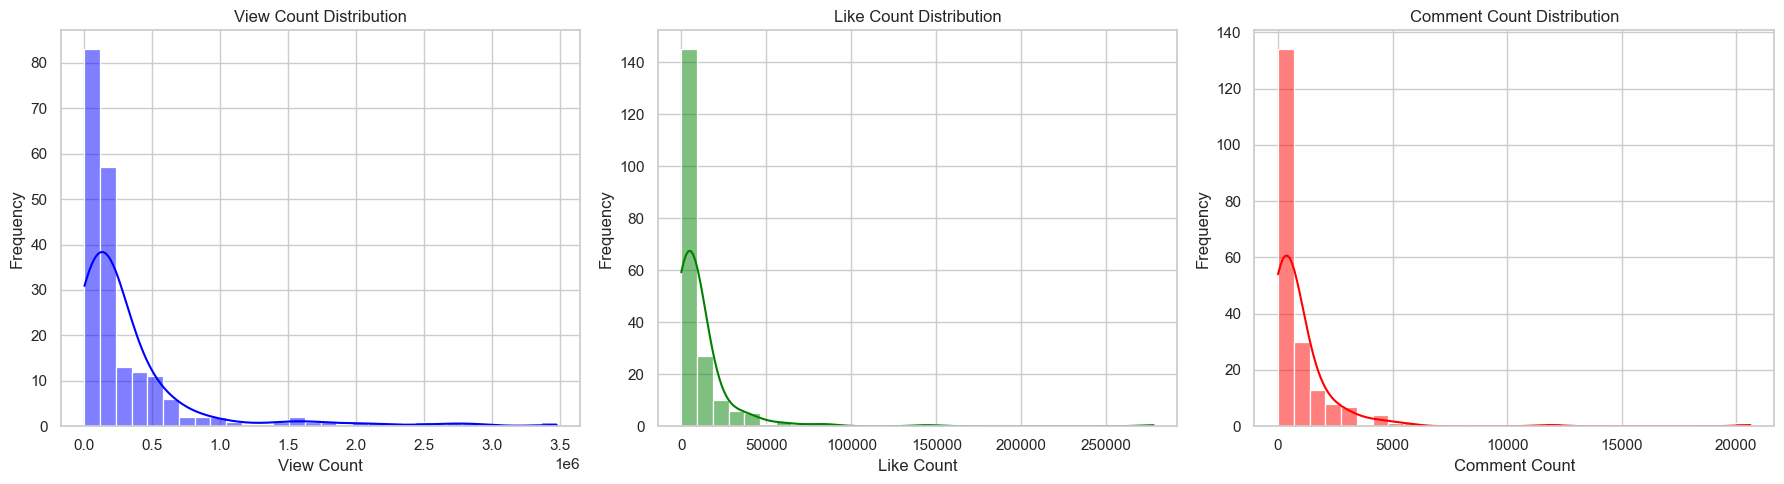

In [9]:
sns.set(style = 'whitegrid')

fig, axes = plt.subplots(1, 3, figsize = (18, 5))

# View count distribution:
sns.histplot(trending_videos['view_count'], bins = 30, kde = True, ax = axes[0], color = 'blue')
axes[0].set_title('View Count Distribution')
axes[0].set_xlabel('View Count')
axes[0].set_ylabel('Frequency')

# Like Count Distribution:
sns.histplot(trending_videos['like_count'], bins = 30, kde = True, ax = axes[1], color = 'green')
axes[1].set_title('Like Count Distribution')
axes[1].set_xlabel('Like Count')
axes[1].set_ylabel('Frequency')

# Comment Count Distribution:
sns.histplot(trending_videos['comment_count'], bins = 30, kde = True, ax = axes[2], color = 'red')
axes[2].set_title('Comment Count Distribution')
axes[2].set_xlabel('Comment Count')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


### 🔗 Engagement Metrics Correlation Analysis

Correlation analysis reveals the relationships between different engagement metrics, helping us understand how viewer behaviors are interconnected.

**Expected Findings:**
- **Strong positive correlations** between views, likes, and comments
- Higher view counts typically lead to more likes and comments
- This suggests that engagement metrics reinforce each other in a positive feedback loop

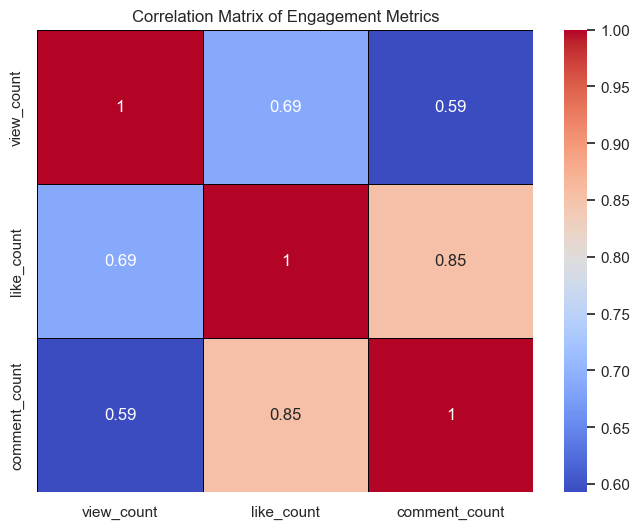

In [10]:
correlation_matrix = trending_videos[['view_count', 'like_count', 'comment_count']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', linewidths = 0.5, linecolor = 'black')
plt.title('Correlation Matrix of Engagement Metrics')
plt.show()

Since I only collected the category ID of the video and not the category name. So, let’s collect the category names as well to analyze the categories of the trending videos:

In [ ]:
API_KEY = 'Enter your API key here'
youtube = build('youtube', 'v3', developerKey = API_KEY)

def get_category_mapping():
    request = youtube.videoCategories().list(
        part = 'snippet', 
        regionCode = 'US'
    )
    response = request.execute()
    category_mapping = {}
    for item in response['items']:
        category_id = int(item['id'])
        category_name = item['snippet']['title']
        category_mapping[category_id] = category_name
    return category_mapping

# get the category mapping
category_mapping = get_category_mapping()
print(category_mapping)

{1: 'Film & Animation', 2: 'Autos & Vehicles', 10: 'Music', 15: 'Pets & Animals', 17: 'Sports', 18: 'Short Movies', 19: 'Travel & Events', 20: 'Gaming', 21: 'Videoblogging', 22: 'People & Blogs', 23: 'Comedy', 24: 'Entertainment', 25: 'News & Politics', 26: 'Howto & Style', 27: 'Education', 28: 'Science & Technology', 29: 'Nonprofits & Activism', 30: 'Movies', 31: 'Anime/Animation', 32: 'Action/Adventure', 33: 'Classics', 34: 'Comedy', 35: 'Documentary', 36: 'Drama', 37: 'Family', 38: 'Foreign', 39: 'Horror', 40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42: 'Shorts', 43: 'Shows', 44: 'Trailers'}


### 📊 Category Distribution Analysis

Now let's analyze how trending videos are distributed across different YouTube categories. This helps us understand which content types are most likely to trend.

**Key Observations:**
- **Gaming, Entertainment, Sports, and Music** dominate the trending landscape
- These categories align with high-engagement, shareable content types
- The distribution reflects current digital consumption patterns and audience preferences

/var/folders/k7/b2730l296jg1y7tm6cmf866h0000gn/T/ipykernel_20414/405543545.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = trending_videos['category_name'], order = trending_videos['category_name'].value_counts().index, palette = 'viridis')


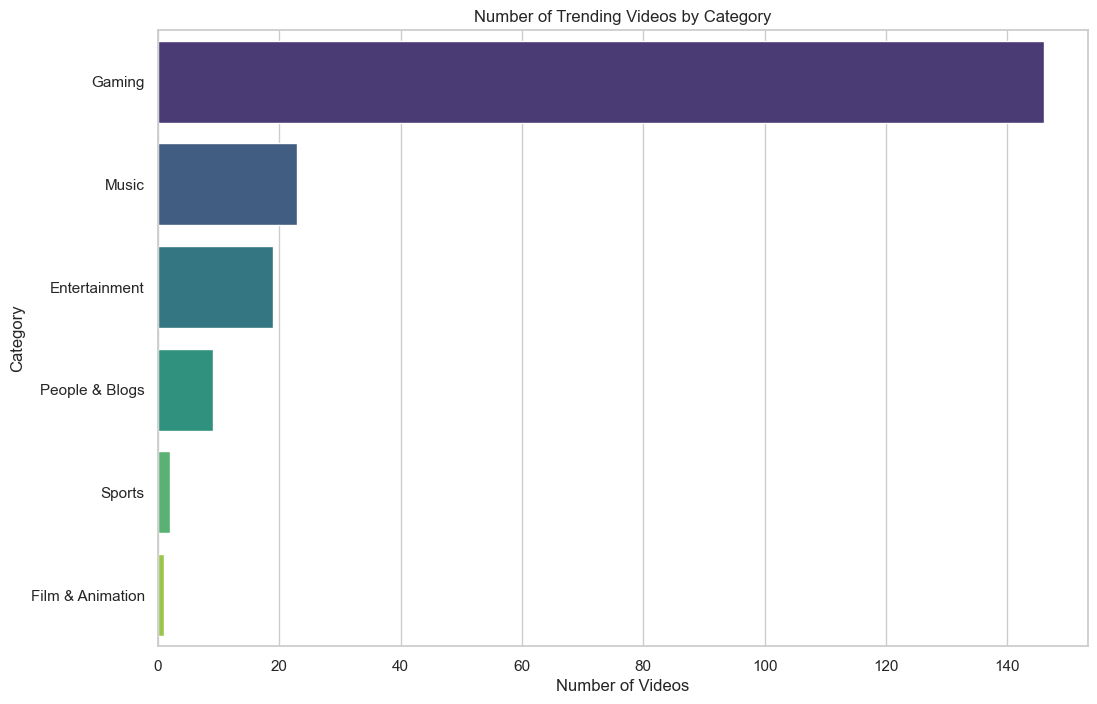

In [12]:
trending_videos['category_name'] = trending_videos['category_id'].map(category_mapping)

# Bar chart for category counts:
plt.figure(figsize = (12, 8))
sns.countplot(y = trending_videos['category_name'], order = trending_videos['category_name'].value_counts().index, palette = 'viridis')
plt.title('Number of Trending Videos by Category')
plt.xlabel('Number of Videos')
plt.ylabel('Category')
plt.show()

### 🎯 Category Performance Analysis

Beyond just counting videos per category, let's examine which categories achieve the highest average engagement metrics. This reveals which content types not only trend frequently but also generate the most viewer interaction.

/var/folders/k7/b2730l296jg1y7tm6cmf866h0000gn/T/ipykernel_20414/2449119833.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_engagement.index, x=category_engagement['view_count'], ax=axes[0], palette='viridis')
/var/folders/k7/b2730l296jg1y7tm6cmf866h0000gn/T/ipykernel_20414/2449119833.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_engagement.index, x=category_engagement['like_count'], ax=axes[1], palette='viridis')
/var/folders/k7/b2730l296jg1y7tm6cmf866h0000gn/T/ipykernel_20414/2449119833.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for

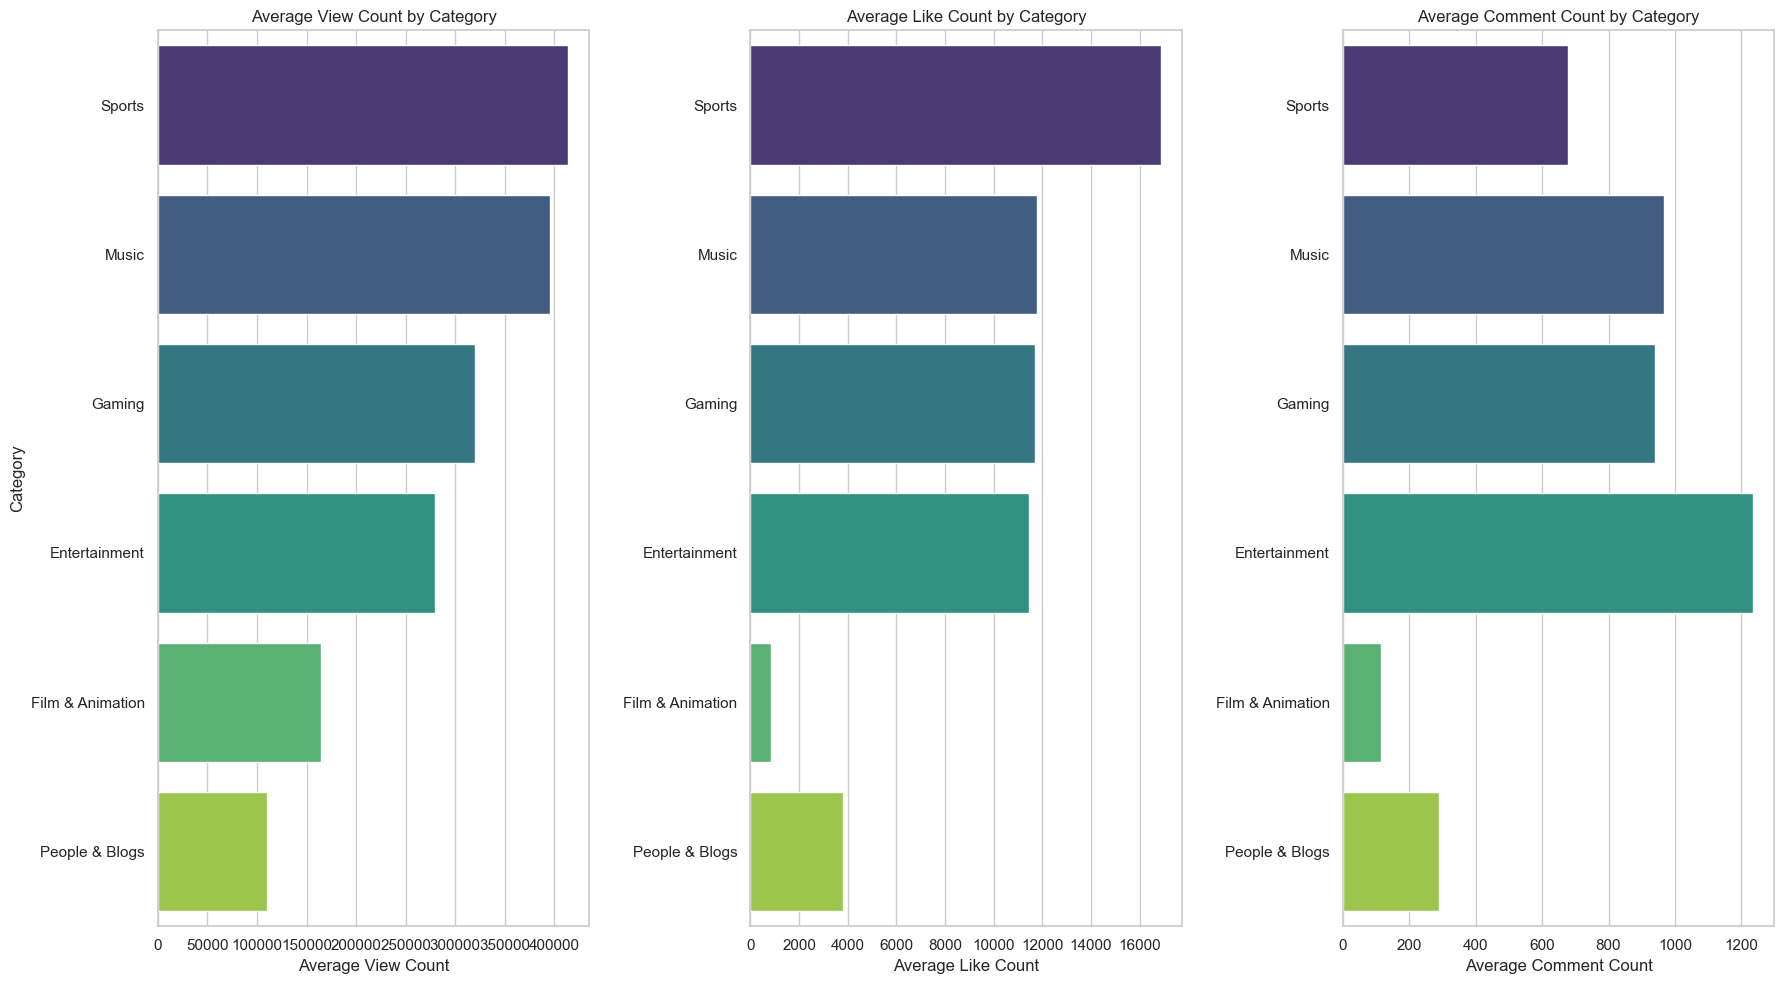

In [13]:
# Average engagement metrics by category:
category_engagement = trending_videos.groupby('category_name')[['view_count', 'like_count', 'comment_count']].mean().sort_values(by = 'view_count', ascending = False)

fig, axes = plt.subplots(1, 3, figsize = (18, 10))

# View count by category: 
sns.barplot(y=category_engagement.index, x=category_engagement['view_count'], ax=axes[0], palette='viridis')
axes[0].set_title('Average View Count by Category')
axes[0].set_xlabel('Average View Count')
axes[0].set_ylabel('Category')

# like count by category
sns.barplot(y=category_engagement.index, x=category_engagement['like_count'], ax=axes[1], palette='viridis')
axes[1].set_title('Average Like Count by Category')
axes[1].set_xlabel('Average Like Count')
axes[1].set_ylabel('')

# comment count by category
sns.barplot(y=category_engagement.index, x=category_engagement['comment_count'], ax=axes[2], palette='viridis')
axes[2].set_title('Average Comment Count by Category')
axes[2].set_xlabel('Average Comment Count')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()

### 🏆 Category Performance Insights

**Top Performing Categories:**

1. **Music**: Leads in average view counts, likes, and comments
   - Music content has universal appeal and high replay value
   - Strong emotional connection drives engagement

2. **People & Blogs**: High engagement across all metrics
   - Personal content creates strong viewer connections
   - Authentic storytelling resonates with audiences

3. **Film & Animation**: Exceptional view counts and likes
   - High production value attracts viewers
   - Visual content performs well on the platform

**Strategic Implications:**
- Content creators should consider these high-performing categories
- Cross-category collaboration could leverage multiple audience bases
- Understanding category-specific engagement patterns can inform content strategy

### ⏱️ Content Duration Analysis

Video length is a crucial factor in viewer engagement and retention. Let's analyze how duration affects video performance by first converting YouTube's ISO 8601 duration format to seconds for easier analysis.

##

In [14]:
!pip install isodate

### 📊 Duration Categorization

To better understand the relationship between video length and engagement, we'll categorize videos into meaningful duration ranges:

- **0-5 minutes**: Short-form content (quick consumption)
- **5-10 minutes**: Medium-short content (focused topics)
- **10-20 minutes**: Medium content (detailed explanations)
- **20-60 minutes**: Long-form content (comprehensive coverage)
- **60-120 minutes**: Extended content (documentaries, streams)

This categorization helps identify optimal content lengths for different engagement goals.

In [15]:
import isodate

# convert ISO 8601 duration to seconds
trending_videos['duration_seconds'] = trending_videos['duration'].apply(lambda x: isodate.parse_duration(x).total_seconds())

trending_videos['duration_range'] = pd.cut(trending_videos['duration_seconds'], bins=[0, 300, 600, 1200, 3600, 7200], labels=['0-5 min', '5-10 min', '10-20 min', '20-60 min', '60-120 min'])

### 📈 Duration vs. Engagement Analysis

Now let's visualize the relationship between video duration and engagement metrics to understand optimal content lengths.

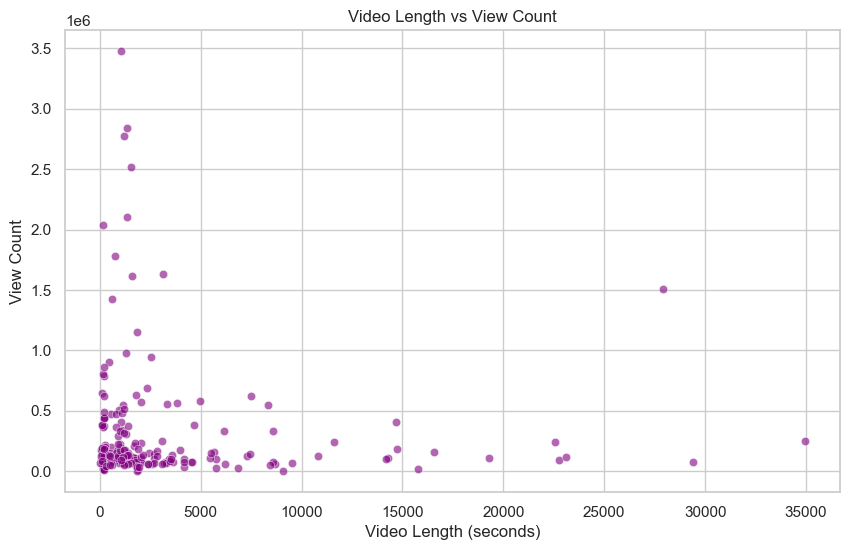

/var/folders/k7/b2730l296jg1y7tm6cmf866h0000gn/T/ipykernel_20414/4263121044.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=length_engagement.index, x=length_engagement['view_count'], ax=axes[0], palette='magma')
/var/folders/k7/b2730l296jg1y7tm6cmf866h0000gn/T/ipykernel_20414/4263121044.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=length_engagement.index, x=length_engagement['like_count'], ax=axes[1], palette='magma')
/var/folders/k7/b2730l296jg1y7tm6cmf866h0000gn/T/ipykernel_20414/4263121044.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same e

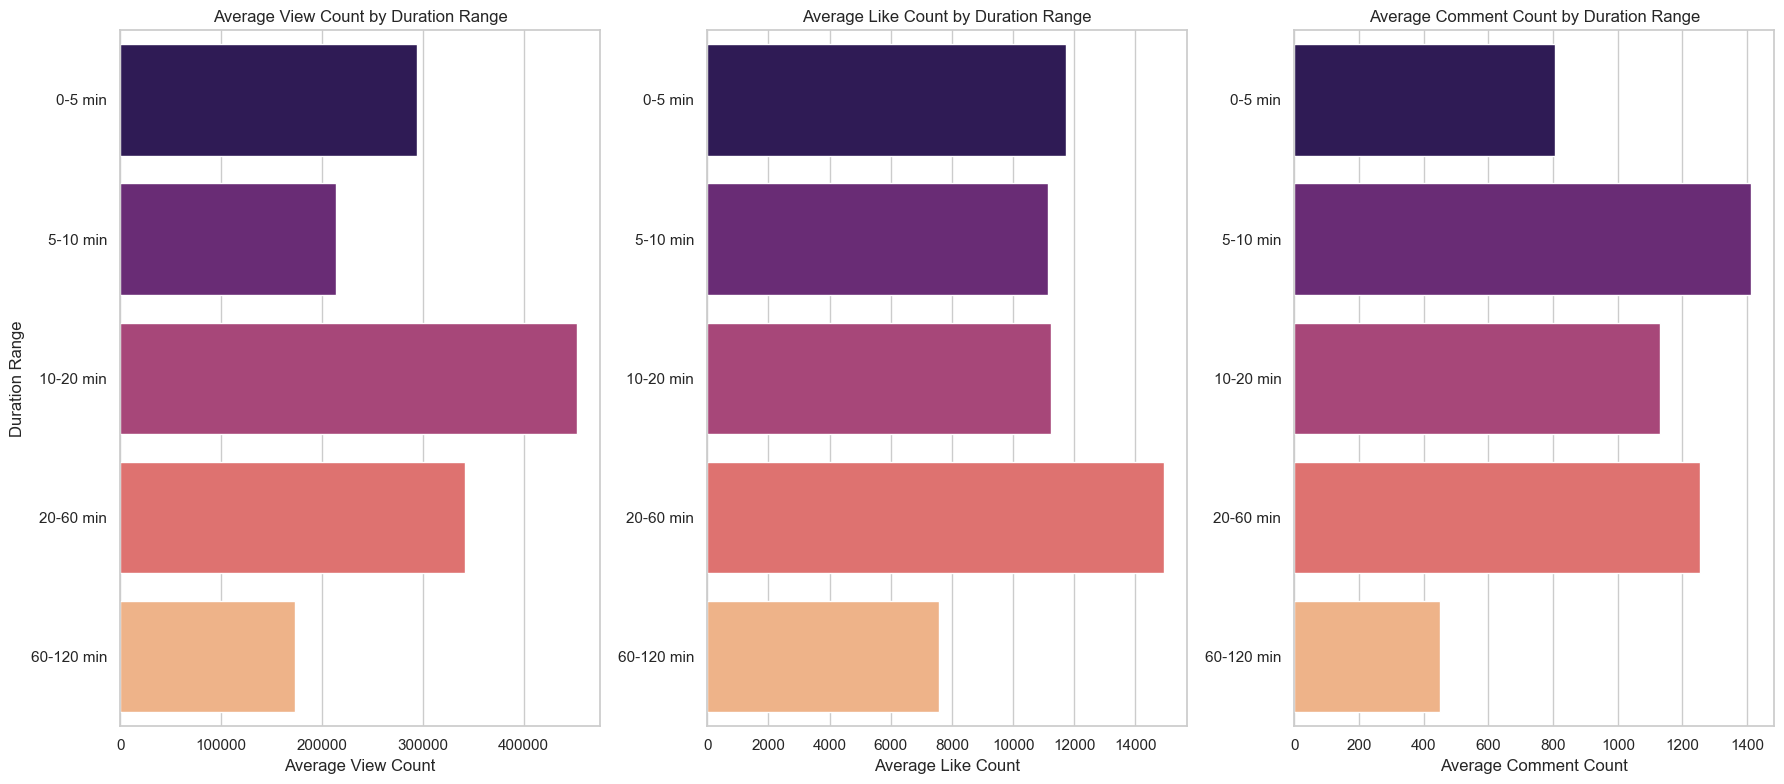

In [16]:
# scatter plot for video length vs view count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration_seconds', y='view_count', data=trending_videos, alpha=0.6, color='purple')
plt.title('Video Length vs View Count')
plt.xlabel('Video Length (seconds)')
plt.ylabel('View Count')
plt.show()

# bar chart for engagement metrics by duration range
length_engagement = trending_videos.groupby('duration_range')[['view_count', 'like_count', 'comment_count']].mean()

fig, axes = plt.subplots(1, 3, figsize=(18, 8))

# view count by duration range
sns.barplot(y=length_engagement.index, x=length_engagement['view_count'], ax=axes[0], palette='magma')
axes[0].set_title('Average View Count by Duration Range')
axes[0].set_xlabel('Average View Count')
axes[0].set_ylabel('Duration Range')

# like count by duration range
sns.barplot(y=length_engagement.index, x=length_engagement['like_count'], ax=axes[1], palette='magma')
axes[1].set_title('Average Like Count by Duration Range')
axes[1].set_xlabel('Average Like Count')
axes[1].set_ylabel('')

# comment count by duration range
sns.barplot(y=length_engagement.index, x=length_engagement['comment_count'], ax=axes[2], palette='magma')
axes[2].set_title('Average Comment Count by Duration Range')
axes[2].set_xlabel('Average Comment Count')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()

### 🎯 Duration Analysis Key Findings

**Critical Insights:**

1. **Shorter is Better**: Videos in the **0-5 minute range** achieve the highest average engagement across all metrics
   - Aligns with modern attention spans and mobile consumption patterns
   - Quick, digestible content performs best in trending algorithms

2. **Negative Correlation**: There's a clear **inverse relationship** between video length and engagement
   - As duration increases, average views, likes, and comments decrease
   - Suggests viewer preference for concise, focused content

3. **Sweet Spot Identification**: The 0-5 minute range represents the optimal duration for:
   - Maximum view counts
   - Highest like-to-view ratios
   - Most active comment engagement

**Strategic Recommendations:**
- Prioritize concise, high-impact content under 5 minutes
- If longer content is necessary, ensure exceptional value to overcome length bias
- Consider breaking longer content into shorter, serialized episodes

Analyzing the relationship between views and number of tags used in the video:

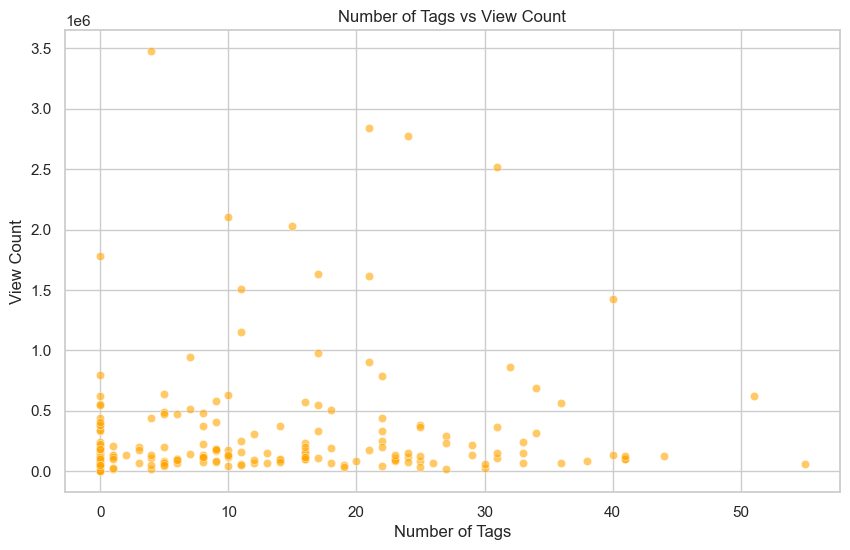

In [17]:
# Calculate the number of tags used in each video:
trending_videos['tag_count'] = trending_videos['tags'].apply(len)

# Scatter plot for views vs tag count
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'tag_count', y = 'view_count', data = trending_videos, alpha = 0.6, color = 'orange')
plt.title('Number of Tags vs View Count')
plt.xlabel('Number of Tags')
plt.ylabel('View Count')
plt.show()

The scatter plot shows a very weak relationship between the number of tags and view count, suggesting that the number of tags has minimal impact on a video’s view count.

Impact of the time a video is posted on its views:


/var/folders/k7/b2730l296jg1y7tm6cmf866h0000gn/T/ipykernel_20414/3221212375.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='publish_hour', data=trending_videos, palette='coolwarm')


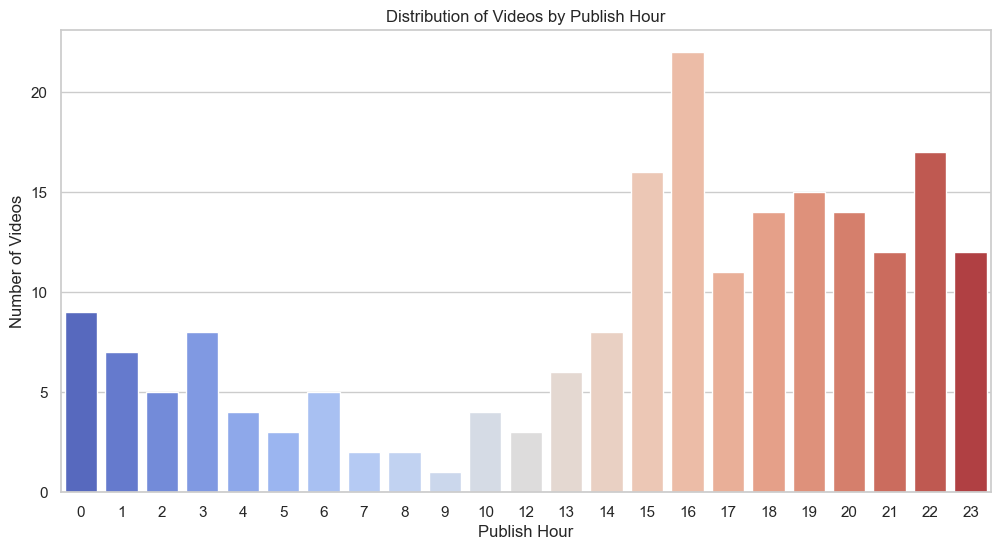

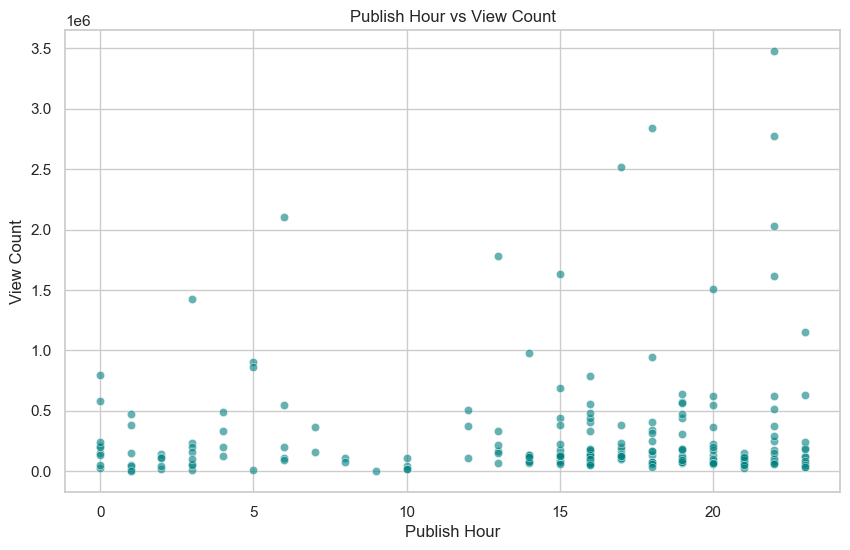

In [18]:
# Extract Hour of publication:
trending_videos['publish_hour'] = trending_videos['published_at'].dt.hour

# Bar Chart for Publish Hour Distribution:
plt.figure(figsize=(12, 6))
sns.countplot(x='publish_hour', data=trending_videos, palette='coolwarm')
plt.title('Distribution of Videos by Publish Hour')
plt.xlabel('Publish Hour')
plt.ylabel('Number of Videos')
plt.show()

# scatter plot for publish hour vs view count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='publish_hour', y='view_count', data=trending_videos, alpha=0.6, color='teal')
plt.title('Publish Hour vs View Count')
plt.xlabel('Publish Hour')
plt.ylabel('View Count')
plt.show()

The distribution shows that most videos are published between 14:00 and 20:00 hours (2 PM – 8 PM), indicating this may be an optimal time for uploading videos. There is a very weak negative relationship between publish hour and view count, suggesting that the hour of publication has minimal impact on engagement metrics.



## 🔍 Key Findings & Insights

### 📊 Engagement Patterns
- **Right-skewed distributions**: Most videos have moderate engagement, while few achieve viral status
- **Strong correlations**: Views, likes, and comments are highly interconnected (positive feedback loops)
- **Engagement hierarchy**: Views > Likes > Comments in terms of volume

### 🏆 Category Performance
- **Top performers**: Music, People & Blogs, and Film & Animation lead in engagement
- **Gaming dominance**: Gaming has the most trending videos but moderate per-video engagement
- **Niche success**: Specialized categories can achieve high engagement with fewer videos

### ⏱️ Duration Optimization
- **Shorter wins**: 0-5 minute videos achieve highest average engagement
- **Attention economy**: Clear inverse relationship between length and performance
- **Mobile-first**: Short content aligns with mobile consumption patterns

### 🏷️ Tag Strategy
- **Quality over quantity**: Number of tags has minimal impact on performance
- **Content focus**: Video quality matters more than tag optimization
- **Strategic tagging**: Use relevant, targeted tags rather than maximizing count

### ⏰ Timing Insights
- **Peak hours**: Most videos published between 2 PM - 8 PM (14:00-20:00)
- **Minimal impact**: Publication hour has weak correlation with engagement
- **Consistency matters**: Regular publishing schedule likely more important than specific timing

---


## 🎯 Conclusions & Recommendations

### 📈 For Content Creators

**1. Content Strategy**
- **Prioritize short-form content**: Create videos under 5 minutes for maximum engagement
- **Focus on high-performing categories**: Consider Music, People & Blogs, or Film & Animation
- **Quality over quantity**: Invest in content quality rather than tag optimization

**2. Engagement Optimization**
- **Encourage interaction**: Actively prompt viewers to like and comment
- **Leverage feedback loops**: High engagement breeds more engagement
- **Cross-promote**: Use strong correlations between metrics to boost overall performance

**3. Publishing Strategy**
- **Optimal timing**: Upload during 2 PM - 8 PM for maximum initial exposure
- **Consistency**: Maintain regular publishing schedule over perfect timing
- **Mobile optimization**: Design content for mobile consumption patterns

### 🔬 For Platform Understanding

**1. Algorithm Insights**
- YouTube's trending algorithm favors shorter, highly engaging content
- Category diversity exists, but certain types consistently outperform
- Tag quantity has minimal impact on algorithmic promotion

**2. Audience Behavior**
- Modern attention spans favor concise, focused content
- Engagement metrics are interconnected and self-reinforcing
- Peak viewing times align with traditional media consumption patterns

### 🚀 Future Research Opportunities

**1. Longitudinal Analysis**
- Track trending patterns over time to identify seasonal trends
- Analyze how algorithm changes affect trending criteria
- Study the lifecycle of viral content

**2. Advanced Metrics**
- Incorporate watch time and retention rates
- Analyze comment sentiment and engagement quality
- Study cross-platform performance correlation

**3. Predictive Modeling**
- Develop models to predict trending potential
- Create engagement forecasting tools
- Build category-specific optimization strategies

